## 개요 ##


- 한국에서 전복을 판매할 때 '미'라는 단위로 판매한다.
- 이는 kg 당 마리수로 판단하는데, 10미라하고 하면 1kg에 10마리라는 의미다.
- 미의 계수가 커질수록 전복의 수는 많지만 크기는 작고, 계수가 작으면 전복의 수는 적지만 크기는 크다.
- 전복의 크기가 작으면 순살이 적어 먹는 양이 줄고, 크기가 너무 크면 식감이 떨어지기 때문에 크기를 적당히 선택해야 한다.
- 전복의 순살 무게를 인공지능으로 예측할 수 있는 방안을 모색한다.


## 사용 알고리즘 ##
- 선형회귀
- 인공신경망


## 데이터 수집 ##
- 삼양미디어 고객센터 자료실


## 전복(abalone) 순살 무게 예측 ##
 - Abalone Dataset : 1994년 4177개 전복의 8개 속성을 나타냄
 - 속성(feature)는 8개
   - Length: 길이/최장 쉘 측정
   - Diameter: 직경/길이에 수직
   - Height: 두께/껍질과 살 포함
   - Whole weight: 전체 무게/ 그램 단위
   - Viscera weight: 내장 무게/장 무게(출혈 후)
   - Shell weight: 껍질 무게/건조 후
   - Rings: -/+ 연도를 나타냄
   - Shucked weight: 순살무게/ 그램 단위
 - 참고자료(UCI저장소)
   - http://archive.ics.uci.edu/ml/datasets/Abalone


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# 데이터 로드 
df = pd.read_csv('./abalone.csv')
df.head(10)

,길이,직경,두께,전체무게,내장무게,껍질무게,나이테,순살무게
0,0.455,0.365,0.095,0.5140,0.1010,0.150,15,0.2245
1,0.350,0.265,0.090,0.2255,0.0485,0.070,7,0.0995
2,0.530,0.420,0.135,0.6770,0.1415,0.210,9,0.2565
3,0.440,0.365,0.125,0.5160,0.1140,0.155,10,0.2155
4,0.330,0.255,0.080,0.2050,0.0395,0.055,7,0.0895
5,0.425,0.300,0.095,0.3515,0.0775,0.120,8,0.1410
6,0.530,0.415,0.150,0.7775,0.1415,0.330,20,0.2370
7,0.545,0.425,0.125,0.7680,0.1495,0.260,16,0.2940
8,0.475,0.370,0.125,0.5095,0.1125,0.165,9,0.2165
9,0.550,0.440,0.150,0.8945,0.1510,0.320,19,0.3145


In [5]:
df.isnull().sum()

길이      0
직경      0
두께      0
전체무게    0
내장무게    0
껍질무게    0
나이테     0
순살무게    0
dtype: int64

In [ ]:
# 입력 데이터 (x) 순살 무게 제외 나머지 칼럼
# 입력 데이터 (y) 순살 무게 
dataset = df.values
dataset

X = dataset[:, :7] # 0~6 번 컬럼 
y = dataset[:, 7] # 7번 컬럼 출력 

In [8]:
# 학습 데이터, 테스트 데이터 7:3 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2923, 7), (1254, 7), (2923,), (1254,))

In [9]:
# 선형 회귀 모델 작성 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# 설정한 알고리즘에 훈련 데이터를 각각 입력하고 모델확인 
model = lin_reg.fit(X_train,y_train)

In [11]:
# 정확도 측정 
print(f'정확도: { model.score(X_train,y_train)}')

정확도: 0.9735009448826057


In [13]:
# 가중치 편향 확인 : y = wx + b 
w = model.coef_
b = model.intercept_

print(f'가중치(w): {w}')
print(f'입력값(b): {b}')


# 전복 순살 무게 = (0.13216544 * 길이) + (0.07453926 * 직격) + (0.03037804 * 두께) +
# (0.69165655 * 전체무게) - (0.41884668 * 내장무게) -
# (0.68525444 * 껍데기무게) - (0.00646454 * 나이테) - 0.014075705572578923


가중치(w): [ 0.15311007  0.02300385  0.0028741   0.7299719  -0.47801252 -0.74987139
 -0.00589098]
입력값(b): -0.011009037547579537


In [15]:
# 모델 테스트 
y_pred = model.predict(X_test)

for i in range(10):
    label = y_test[i]
    prediction = y_pred[i]
    print(f'실제무게:{label: .3f}, 예측 순살무게{prediction: .3f}')
    # .3f = 3번째 소숫점까지 자름 

실제무게: 0.421, 예측 순살무게 0.457
실제무게: 0.387, 예측 순살무게 0.393
실제무게: 0.305, 예측 순살무게 0.349
실제무게: 0.538, 예측 순살무게 0.553
실제무게: 0.235, 예측 순살무게 0.226
실제무게: 0.177, 예측 순살무게 0.202
실제무게: 0.235, 예측 순살무게 0.247
실제무게: 0.321, 예측 순살무게 0.352
실제무게: 0.086, 예측 순살무게 0.091
실제무게: 0.432, 예측 순살무게 0.434


In [16]:
# 딥러닝 라이브러리 설치 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


- 총 3개층 구성(입력1,은닉1,출력1) 및 28, 7, 1개는 퍼셉트론 개수
- 층을 몇 개로 하고, 층 안에 퍼셉트론을 몇 개로 하는지에 정답은 없음 -> 감으로 익혀야 함
- 활성화 함수는 출력층을 제외하고 모두 'relu'
---
- Sequential() : 딥러닝 모델 층을 만듦
- .add() : 몇 층을 만들 것인지 설정
- Dense() : 만든 층의 세부 설정
- Input_dim=7 : 입력층을 설정할 때만 데이터 속성의 개수가 몇 개인지 넣음


In [20]:
model = Sequential()
model.add(Dense(28, input_dim=7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 28)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             203 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 435 (1.70 KB)

 Trainable params: 435 (1.70 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# loss 방식으로  평균 제곱법 계산: https://hayden-archive.tistory.com/307

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [25]:
# batch_size: 데이터가 많아서 10개 단위로 쪼개서 학습 
# validation_split: 모델 기능 향상을 위해 을종의 모의 테스트를 진행한다.
# 이때 모의 테스트 진행시 검증 데이터 비율 설정 (0.25)
history = model.fit(X_train, y_train, epochs=15, batch_size=10, validation_split=0.25)

# 평균 제곱오차는 값 차이 제곱의 평균을 구한다. 
# accuracy는 결과 값이 맞는 경우의 수를 전체로 나눈 값이다. 
# 따라서 조금만 달라도 0이 나온다 따라서 loss를 평가 지표로 활용.

Epoch 1/15


220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0545 - val_accuracy: 0.0000e+00 - val_loss: 0.0065
Epoch 2/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0042 - val_accuracy: 0.0000e+00 - val_loss: 0.0037
Epoch 3/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0029 - val_accuracy: 0.0000e+00 - val_loss: 0.0028
Epoch 4/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0027 - val_accuracy: 0.0000e+00 - val_loss: 0.0032
Epoch 5/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0027 - val_accuracy: 0.0000e+00 - val_loss: 0.0025
Epoch 6/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0027 - val_accuracy: 0.0000e+00 - val_loss: 0.0023
Epoch 7/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0023 - val_accuracy: 0.0000e+00 - val_loss: 0.0024
Epoch 8/15
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

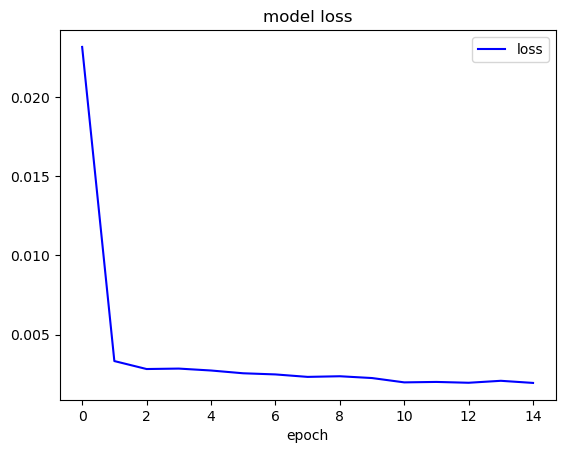

In [26]:
# 오차 상황 그래프 시각화 

plt.plot(history.history['loss'], 'b-', label='loss')
plt.title('model loss')
plt.legend()
plt.xlabel('epoch')
plt.show()

In [ ]:
# 딥러닝 모델 실행 결과 
# 실제 순살과 예측 순살 무게 비교 
model.evaluate(X_test, y_test)

# 손실률 확인 결과 약 0.3그램 정도 오차 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0033


[0.0033619662281125784, 0.0]

In [33]:
# 테스트 데이터 모델 예측 

prediction = model.predict(X_test)

for i in range(10):
    print(f"실제값: {y_test[i]:.3f}, 예측값: {prediction[i][0]:.3f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
실제값: 0.421, 예측값: 0.445
실제값: 0.387, 예측값: 0.370
실제값: 0.305, 예측값: 0.305
실제값: 0.538, 예측값: 0.528
실제값: 0.235, 예측값: 0.174
실제값: 0.177, 예측값: 0.171
실제값: 0.235, 예측값: 0.232
실제값: 0.321, 예측값: 0.312
실제값: 0.086, 예측값: 0.062
실제값: 0.432, 예측값: 0.398


In [35]:
model.save('abalone_model.h5')

In [38]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 28)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             203 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,307 (5.11 KB)

 Trainable params: 435 (1.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 872 (3.41 KB)

In [39]:
print(model.__dict__)


{'_tracker': <keras.src.utils.tracking.Tracker object at 0x000001F11DB0B470>, '_self_setattr_tracking': True, '_trainable_variables': [], '_non_trainable_variables': [], '_layers': [<InputLayer name=input_layer_1, built=True>, <Dense name=dense_3, built=True>, <Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>], '_metrics': [], '_seed_generators': [], '_lock': False, '_auto_config': <keras.src.saving.serialization_lib.SerializableDict object at 0x000001F11DB08260>, 'build': <function Sequential.build at 0x000001F11DCB16C0>, 'quantize': <function Model.quantize at 0x000001F11DCB1760>, '_run_eagerly': False, '_jit_compile': False, 'compiled': True, 'loss': 'mean_squared_error', 'steps_per_execution': 1, '_initial_epoch': None, '_compute_loss_has_training_arg': True, '_compile_loss': <keras.src.trainers.compile_utils.CompileLoss object at 0x000001F11DA67170>, '_compile_metrics': <CompileMetrics name=compile_metrics>, '_loss_tracker': <Mean name=loss>, 'train_function': <fu

In [40]:
print(model.layers)


[<Dense name=dense_3, built=True>, <Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>]


In [41]:
for layer in model.layers:
    print(f"Layer {layer.name}")
    print("Config:", layer.get_config())  # 구성 정보
    print("Weights:", layer.get_weights())  # 가중치와 바이어스


Layer dense_3
Config: {'name': 'dense_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 28, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
Weights: [array([[-0.32347536, -0.40915316, -0.33144546,  0.01329742,  0.04953649,
        -0.32291928, -0.44851238, -0.31417042,  0.00472775,  0.04128781,
        -0.27308172,  0.12935135, -0.06256112,  0.2403195 , -0.06586888,
        -0.41369563, -0.07751518,  0.43338665,  0.35892174, -0.3784292 ,
        -0.12444207, -0.07591069,  0.0529162 , -0.13319138,  0.25876513,
         0.06787848,  0.02159443,  0